In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned.csv')

In [3]:
# summary statistics of numeric variables
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Commerce,hsc_s_Science,hsc_s_Arts,degree_t_Sci&Tech,degree_t_Comm&Mgmt,degree_t_Others
0,M,67.00,0,91.00,0,Commerce,58.00,Sci&Tech,0,55.0,0,58.80,1,270000.0,1,0,0,1,0,0
1,M,79.33,1,78.33,0,Science,77.48,Sci&Tech,1,86.5,1,66.28,1,200000.0,0,1,0,1,0,0
2,M,65.00,1,68.00,1,Arts,64.00,Comm&Mgmt,0,75.0,1,57.80,1,250000.0,0,0,1,0,1,0
3,M,56.00,1,52.00,1,Science,52.00,Sci&Tech,0,66.0,0,59.43,0,0.0,0,1,0,1,0,0
4,M,85.80,1,73.60,1,Commerce,73.30,Comm&Mgmt,0,96.8,1,55.50,1,425000.0,1,0,0,0,1,0


C:\Users\manan\AppData\Local\Temp\ipykernel_10836\656346780.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


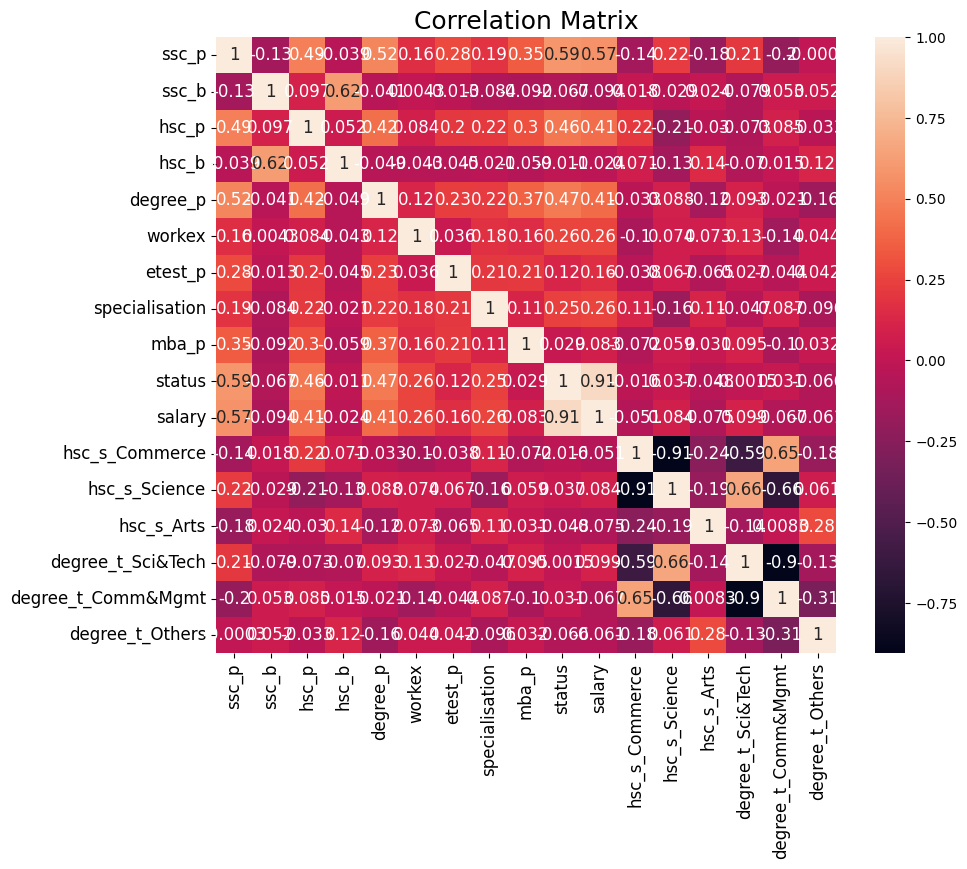

In [60]:
# create a correlation matrix
corr_matrix = df.corr()

# set figure size
plt.figure(figsize=(10,8))

# plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, annot_kws={'size': 12})

# add a title and adjust font size
plt.title('Correlation Matrix', fontsize=18)

# adjust tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# show plot
plt.show()


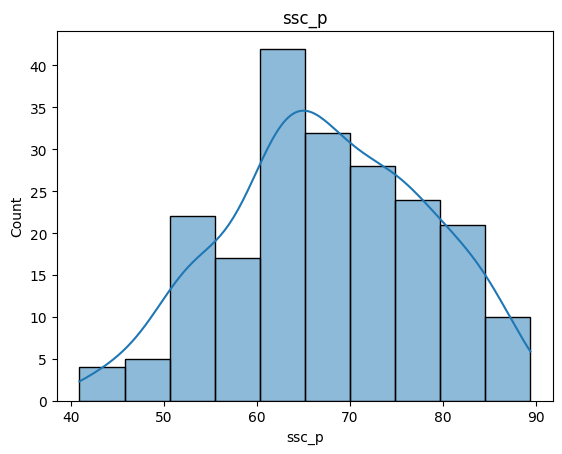

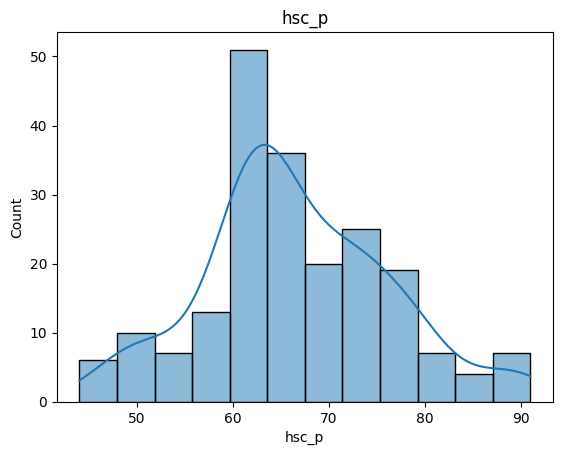

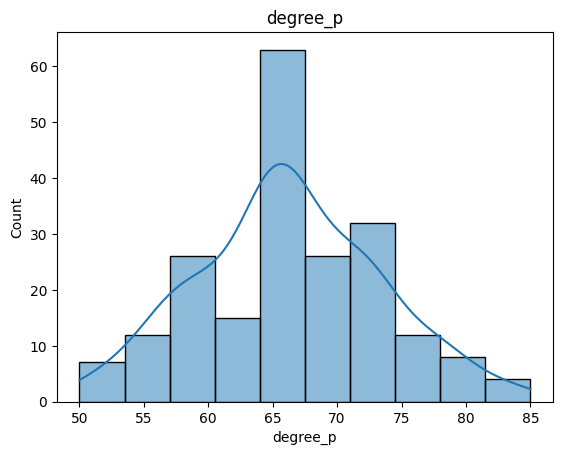

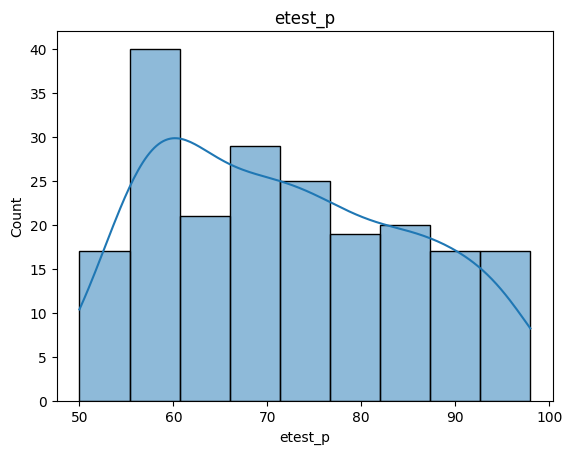

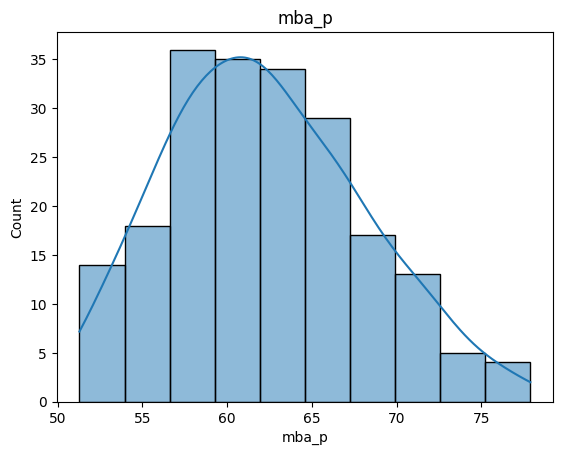

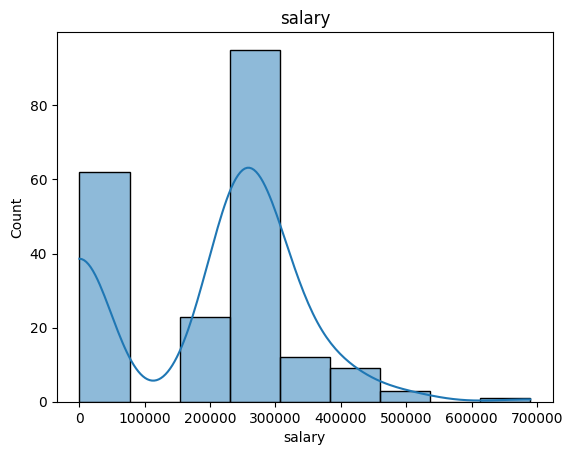

In [5]:
# create histograms and density plots of numeric variables
num_vars = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
for var in num_vars:
    plt.figure()
    sns.histplot(data=df, x=var, kde=True)
    plt.title(var)


C:\Users\manan\AppData\Local\Temp\ipykernel_22684\4062958737.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['gender']).mean().plot(kind='bar', y='salary', color=['#699FA1','#df7027'], title="Average salary based on genders.")


<AxesSubplot: title={'center': 'Average salary based on genders.'}, xlabel='gender'>

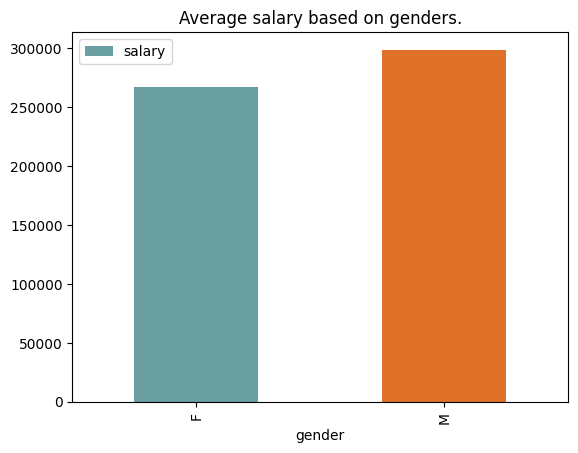

In [64]:
# Q.S.1) who is getting more salary inn the basis of Gender?
df.groupby(['gender']).mean().plot(kind='bar', y='salary', color=['#699FA1','#df7027'], title="Average salary based on genders.")

<AxesSubplot: title={'center': 'Average salary based on specialisation'}, xlabel='specialisation'>

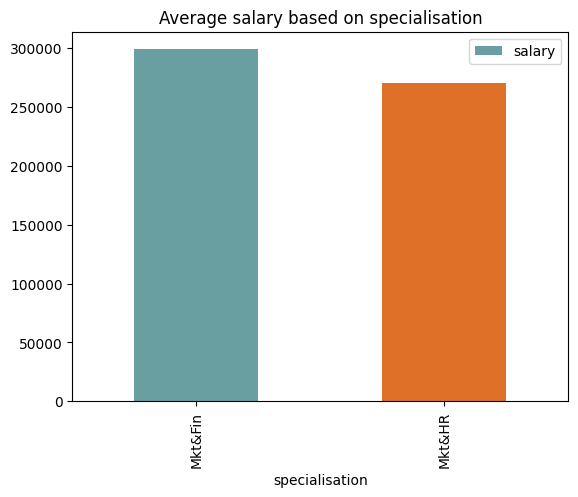

In [62]:
# Q.S.3) which specialization is getting more salary?

# group data by specialisation and calculate mean salary
mean_salary_by_specialisation = df.groupby(['specialisation']).mean(numeric_only=True)

# replace 0 and 1 with the original specialisation titles
mean_salary_by_specialisation = mean_salary_by_specialisation.rename(index={'Mkt&HR': 0, 'Mkt&Fin': 1})
mean_salary_by_specialisation = mean_salary_by_specialisation.rename(index={0: 'Mkt&HR', 1: 'Mkt&Fin'})

# plot bar chart
mean_salary_by_specialisation.plot(kind='bar', y='salary', color=['#699FA1', '#df7027'], title='Average salary based on specialisation')


<AxesSubplot: title={'center': 'Relation between degree percentage, MBA percentage, and Salary.'}, xlabel='degree_p', ylabel='mba_p'>

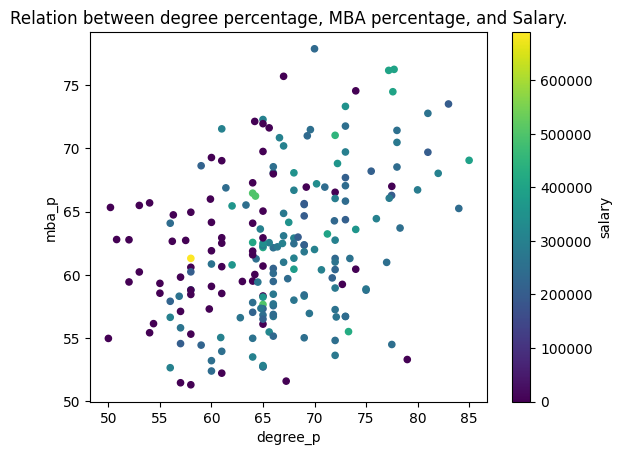

In [35]:
df.plot.scatter(x='degree_p', y='mba_p', c='salary', title="Relation between degree percentage, MBA percentage, and Salary.")

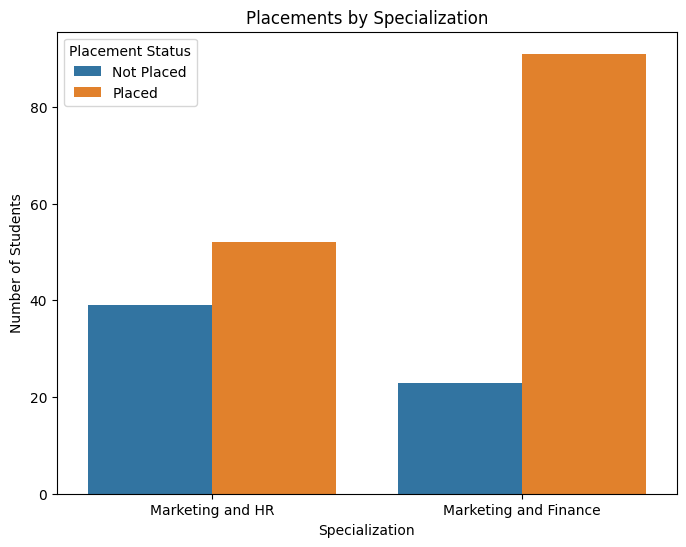

In [71]:
# Q.S.2) which specialization placed more?
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='specialisation', hue='status')
plt.title('Placements by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Number of Students')
plt.xticks([0,1], ['Marketing and HR', 'Marketing and Finance'])
plt.legend(title='Placement Status', labels=['Not Placed', 'Placed'])
plt.show()


Text(0, 0.5, 'Count')

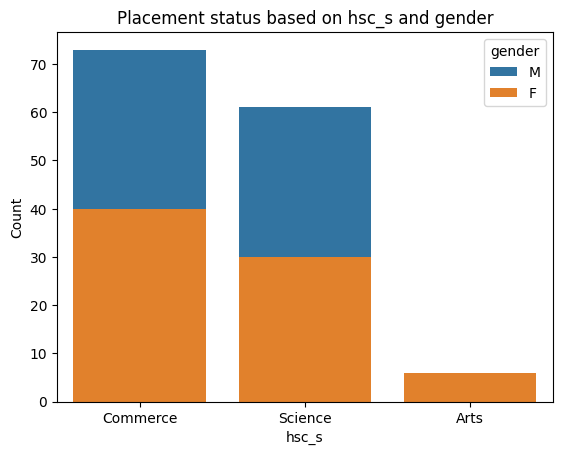

In [66]:
plt.figure()
sns.countplot(data=df, x='hsc_s', hue='gender', hue_order=['M', 'F'], dodge=False)
plt.title('Placement status based on hsc_s and gender')
plt.xlabel('hsc_s')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

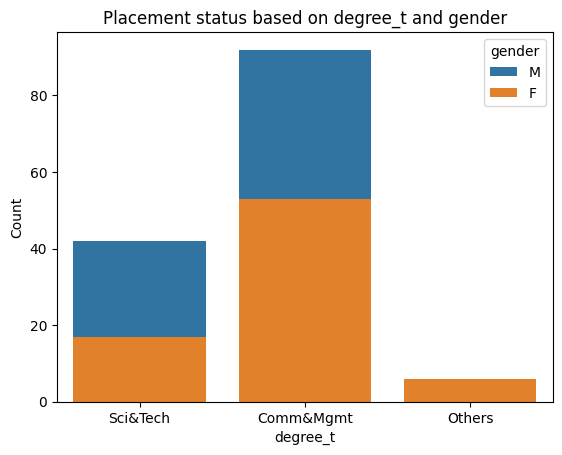

In [67]:
plt.figure()
sns.countplot(data=df, x='degree_t', hue='gender', hue_order=['M', 'F'], dodge=False)
plt.title('Placement status based on degree_t and gender')
plt.xlabel('degree_t')
plt.ylabel('Count')

C:\Users\manan\AppData\Local\Temp\ipykernel_22684\634869515.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='gender', y='workex', ci=None)


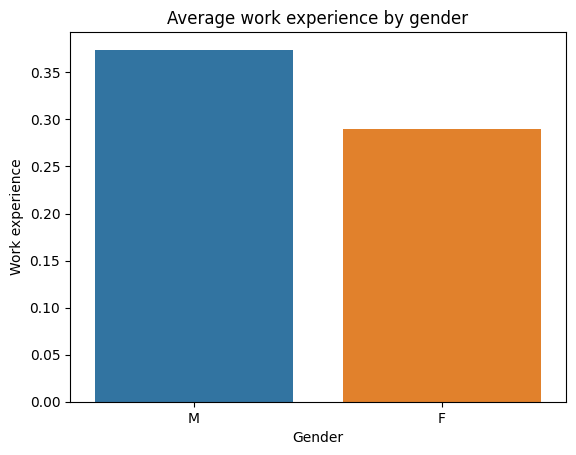

In [32]:
# Create a bar plot
sns.barplot(data=df, x='gender', y='workex', ci=None)

# Customize plot
plt.title('Average work experience by gender')
plt.xlabel('Gender')
plt.ylabel('Work experience')

# Display plot
plt.show()

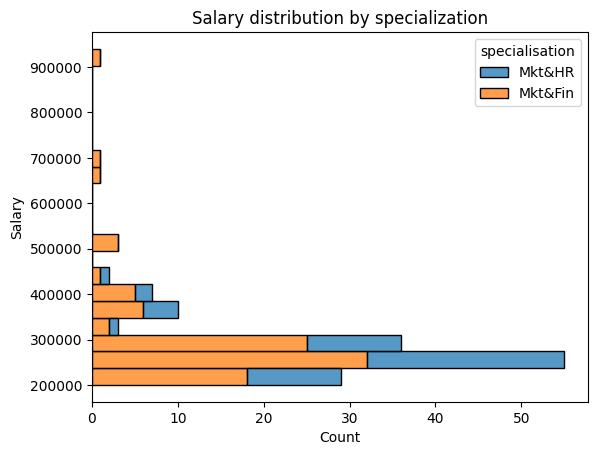

In [65]:
sns.histplot(data=df, y='salary', hue='specialisation', multiple='stack', bins=20)

# Customize plot
plt.title('Salary distribution by specialization')
plt.xlabel('Count')
plt.ylabel('Salary')

# Display plot
plt.show()

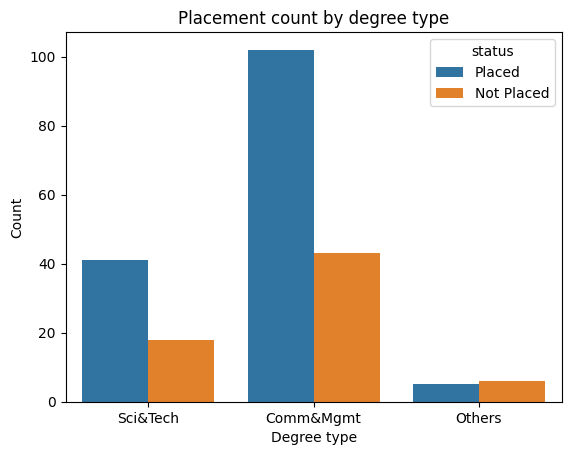

In [46]:
# Create a bar plot
sns.countplot(data=df, x='degree_t', hue='status')

# Customize plot
plt.title('Placement count by degree type')
plt.xlabel('Degree type')
plt.ylabel('Count')

# Display plot
plt.show()


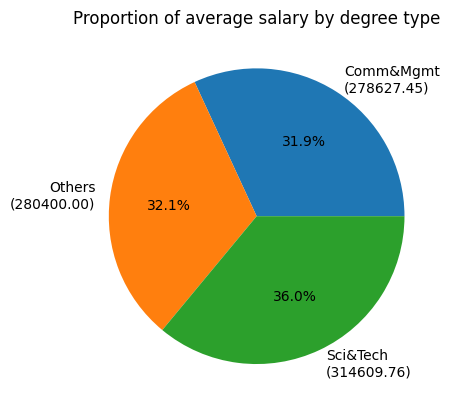

In [57]:
# Calculate the average salary for each degree_t category
salary_by_degree = df.groupby('degree_t')['salary'].mean()

# Create a pie chart of the average salaries by degree_t
labels = [f"{degree_t}\n({salary:.2f})" for degree_t, salary in salary_by_degree.items()]
plt.pie(salary_by_degree, labels=labels, autopct='%1.1f%%')

# Customize plot
plt.title('Proportion of average salary by degree type')

# Display plot
plt.show()

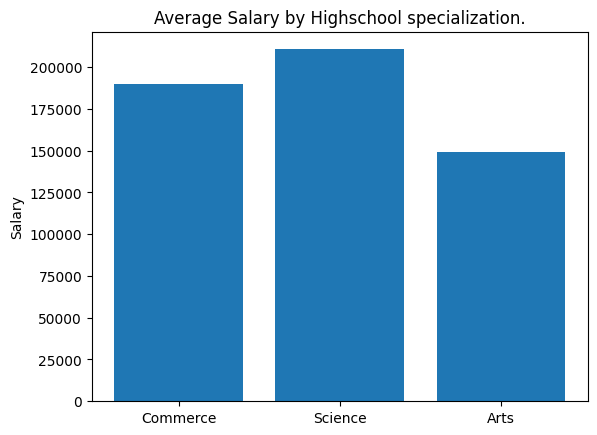

In [20]:

# calculate the average salary for each subject stream
commerce_mean = df[df['hsc_s_Commerce']==1]['salary'].mean()
science_mean = df[df['hsc_s_Science']==1]['salary'].mean()
arts_mean = df[df['hsc_s_Arts']==1]['salary'].mean()

# create a list of means and subject streams
means = [commerce_mean, science_mean, arts_mean]
subjects = ['Commerce', 'Science', 'Arts']

# create a bar chart
fig, ax = plt.subplots()
ax.bar(subjects, means)

# set the title and y-label
ax.set_title('Average Salary by Highschool specialization.')
ax.set_ylabel('Salary')

# display the plot
plt.show()

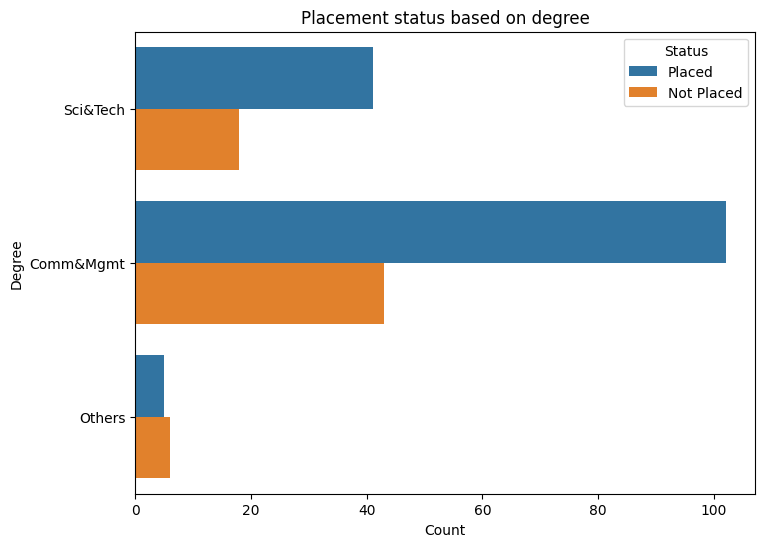

In [59]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, y='degree_t', hue='status')
plt.xlabel('Count')
plt.ylabel('Degree')
plt.title('Placement status based on degree')
plt.legend(title='Status', labels=['Placed', 'Not Placed'])
plt.show()